#Importing reqiured libraries

In [27]:
import numpy as np
import pandas as pd

#**Load the dataset:**
#used pd.read_csv to load the dataset

In [28]:
df=pd.read_csv("/content/Pokemon.csv")

#**shape:**gets no of colunns and rows

In [29]:
df.shape

(800, 12)

#knowing the column names

    'SN',           # Serial Number or Index
    'Name',         # Pokémon name
    'Type 1',       # Primary type (e.g., Fire, Water)
    'Type 2',       # Secondary type (can be NaN if not present)
    'HP',           # Hit Points
    'Attack',       # Physical attack stat
    'Defense',      # Physical defense stat
    'Sp. Attack',   # Special attack stat
    'Sp. Defense',  # Special defense stat
    'Speed',        # Speed stat
    'Generation',   # Game generation the Pokémon appeared in
    'Legendary'     # Boolean indicating if the Pokémon is Legendary

In [30]:
df.columns

Index(['SN', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#getting outliers by representing in matrix form

In [31]:
import missingno as msno

<Axes: >

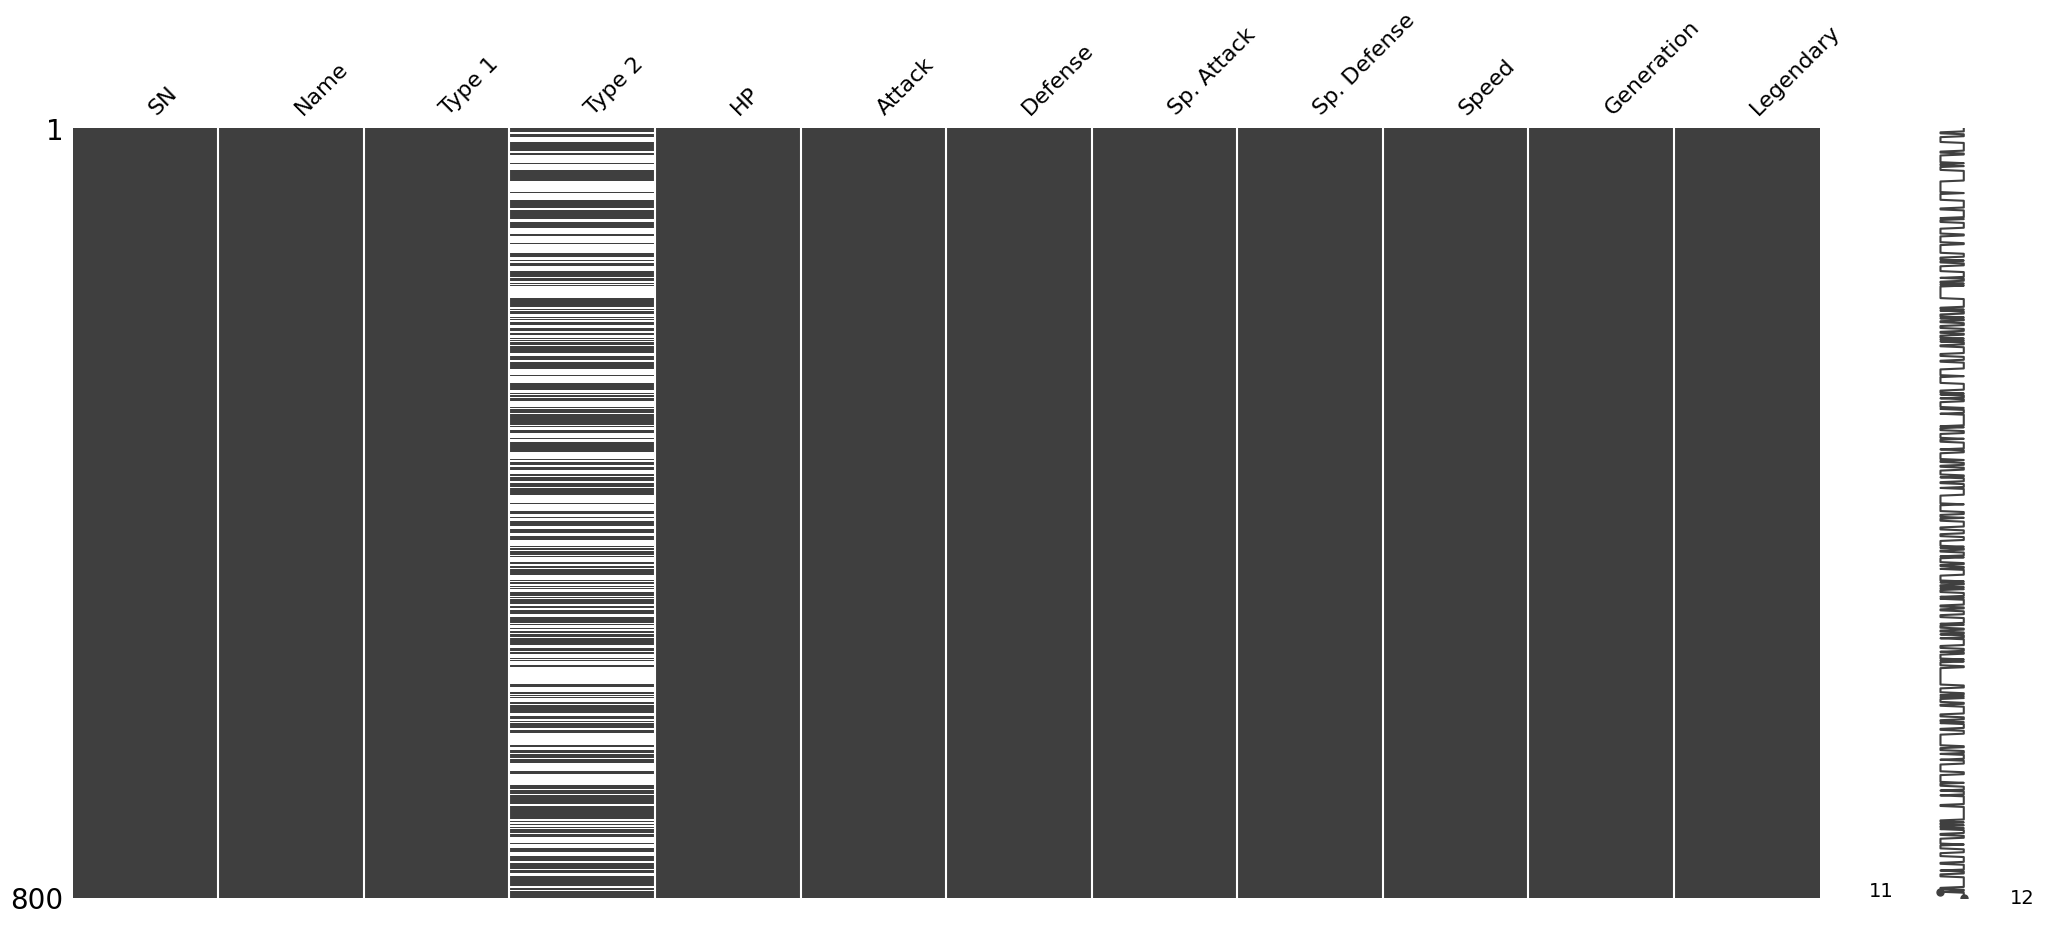

In [32]:
msno.matrix(df)

#**.head:**Uses .head() to preview the first five(default) records.

In [33]:
df.head()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#**Check structure:**Uses .info() to inspect column data types and missing values.



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# **Get summary stats:** Uses .describe() to explore numerical data.

In [35]:
df.describe()

,SN,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#**Find missing values:**Use .isnull().sum() to count nulls in each column.

In [36]:
df.isnull().sum()

,0
SN,0
Name,0
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Attack,0
Sp. Defense,0
Speed,0


percentage is greater than 30 so we need to drop the column

In [37]:
round(df.isnull().sum()/len(df)*100,2)

,0
SN,0.00
Name,0.00
Type 1,0.00
Type 2,48.25
HP,0.00
Attack,0.00
Defense,0.00
Sp. Attack,0.00
Sp. Defense,0.00
Speed,0.00


In [38]:
df=df.drop(columns=["Type 2"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   HP           800 non-null    int64 
 4   Attack       800 non-null    int64 
 5   Defense      800 non-null    int64 
 6   Sp. Attack   800 non-null    int64 
 7   Sp. Defense  800 non-null    int64 
 8   Speed        800 non-null    int64 
 9   Generation   800 non-null    int64 
 10  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


#**Understand categories**Use .value_counts() for key categorical columns.

In [40]:
df["Name"].value_counts()

,count
Name,
PumpkabooSuper Size,1
PumpkabooLarge Size,1
PumpkabooSmall Size,1
PumpkabooAverage Size,1
Trevenant,1
...,...
Charmander,1
VenusaurMega Venusaur,1
Venusaur,1


In [41]:
df["Type 1"].value_counts()

,count
Type 1,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ground,32


In [42]:
df["Name"].dtype

dtype('O')

In [43]:
df["SN"].dtype

dtype('int64')

In [44]:
import missingno as msno

<Axes: >

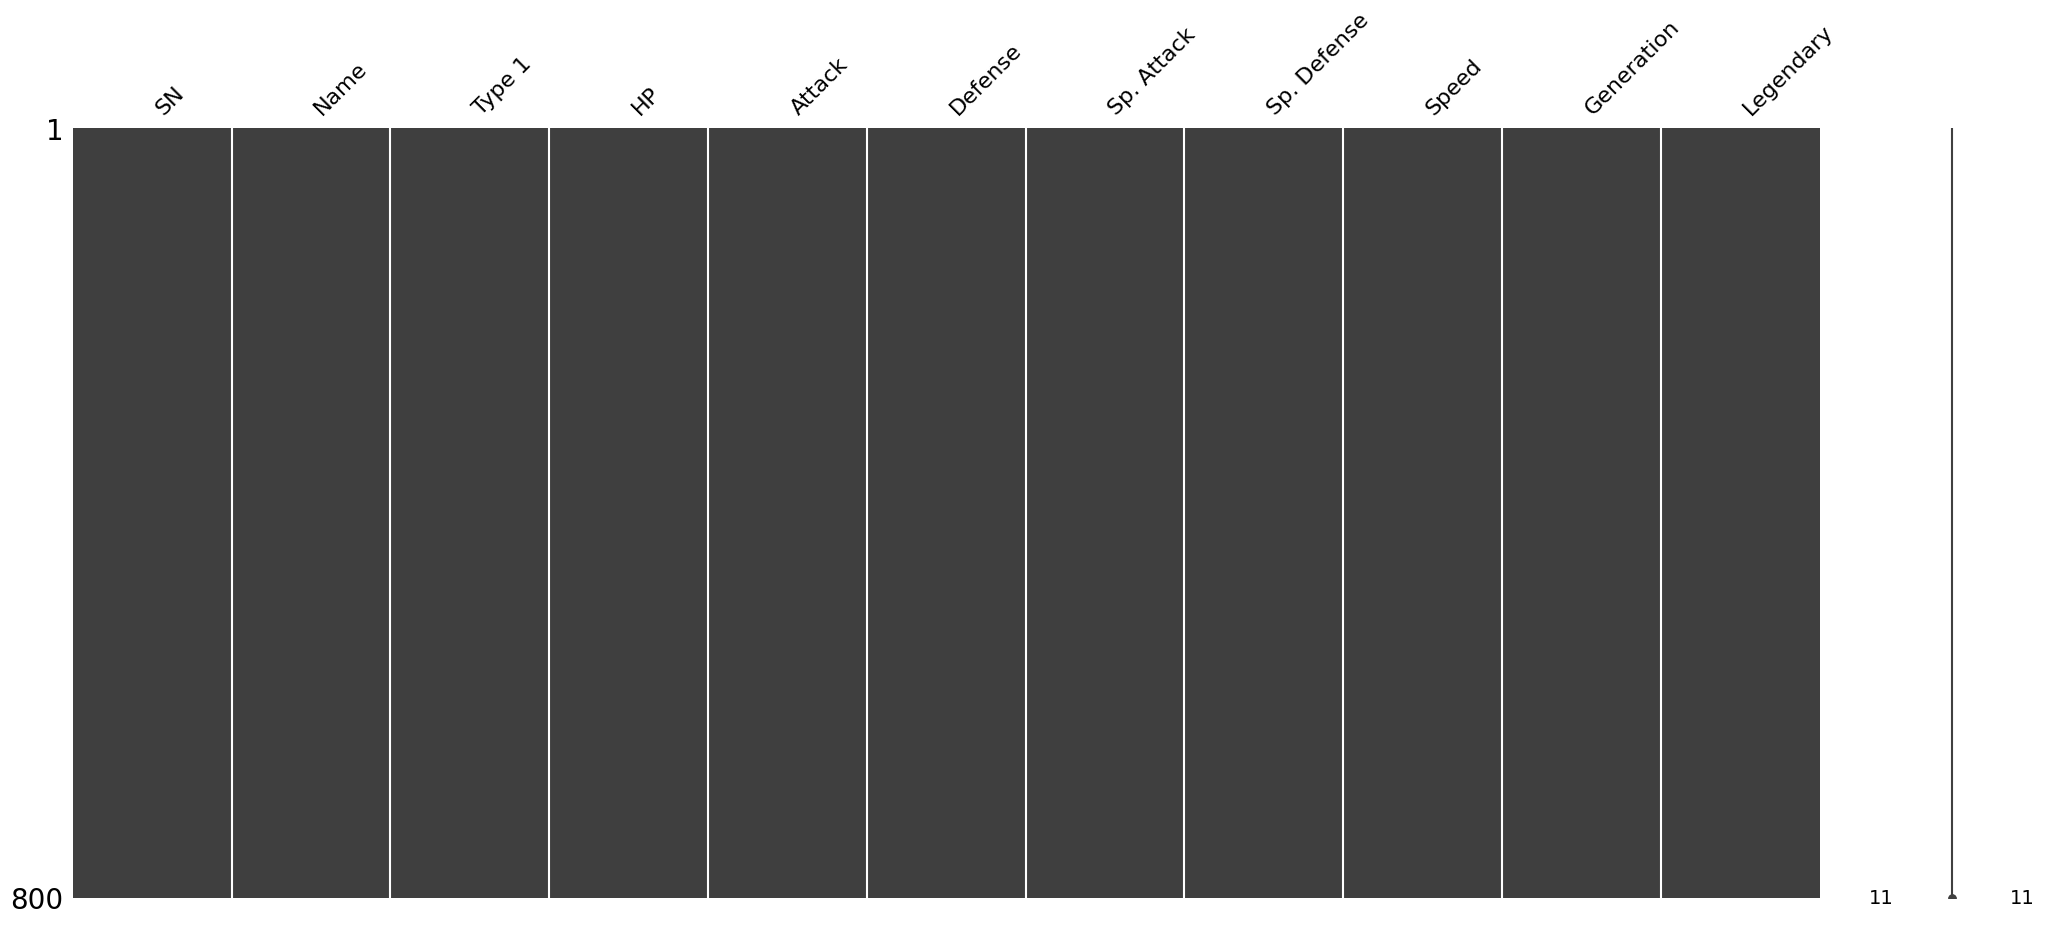

In [45]:
msno.matrix(df)